# Medical Insurance Price Prediction

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [29]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# Exploratory data analysis

In [32]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

There isnt any null values

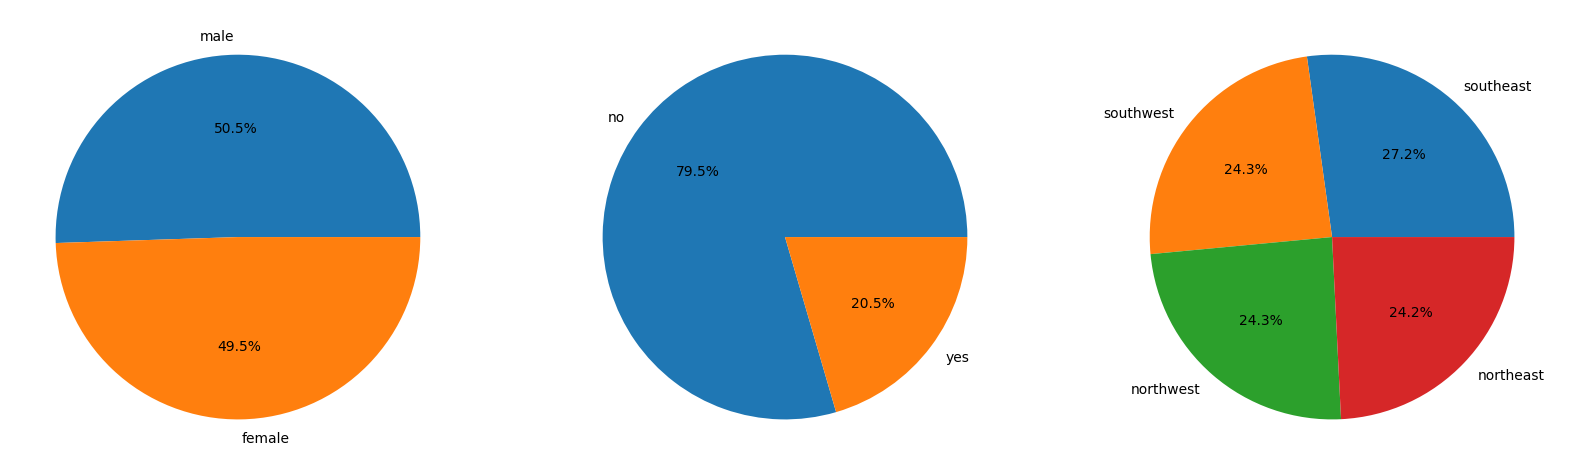

In [33]:
features = ['sex', 'smoker', 'region']
 
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
 
    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
plt.show()

Pie chart for the sex, smoker, and region column

While the sex and region columns of the data are equally distributed, we can see an 80:20 ratio in the smoker column.

# Comparison between expenses paid between different groups

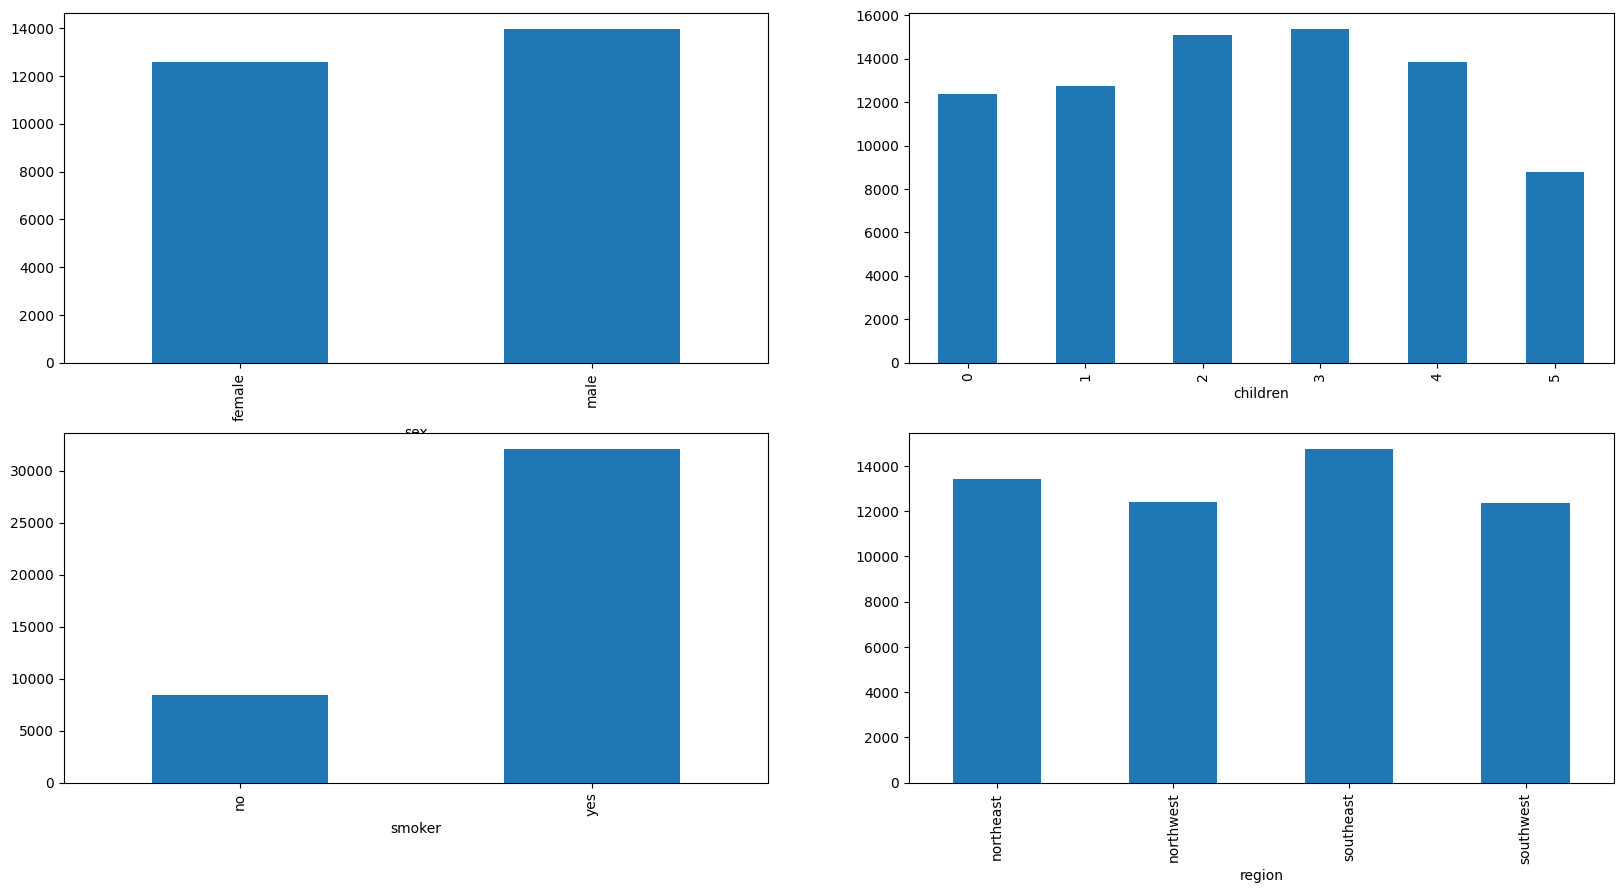

In [34]:
features = ['sex', 'children', 'smoker', 'region']
 
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['expenses'].plot.bar()
plt.show()

Males pay slightly more in fees than females do, but the difference is not very large.
The premium that smokers pay is roughly three times what non-smokers pay.
The four specified regions have roughly the same prices.

# Scatter plot of the expenses paid v/s age and BMI respectively

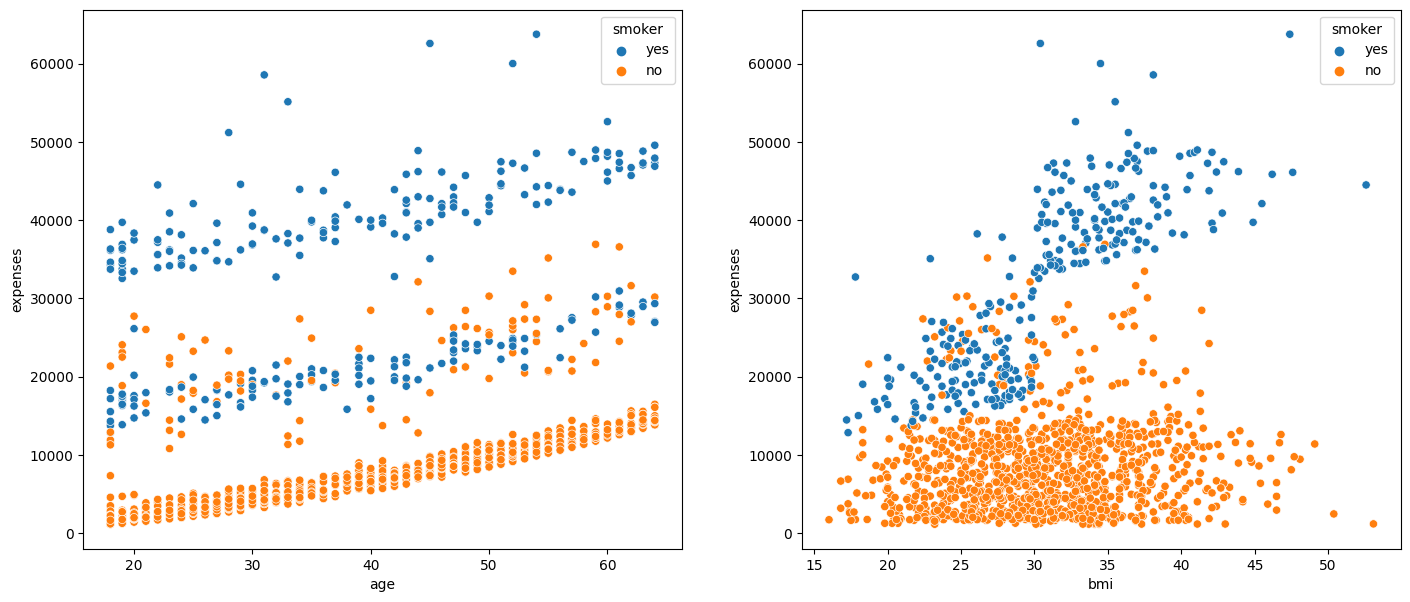

In [35]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col, y='expenses', hue='smoker')

plt.show()

Here, there is a definite distinction between the fees that smokers must pay. Additionally, we can see that premium costs increase along with an individual's advancing years.

# Data Pre-processing

<Axes: >

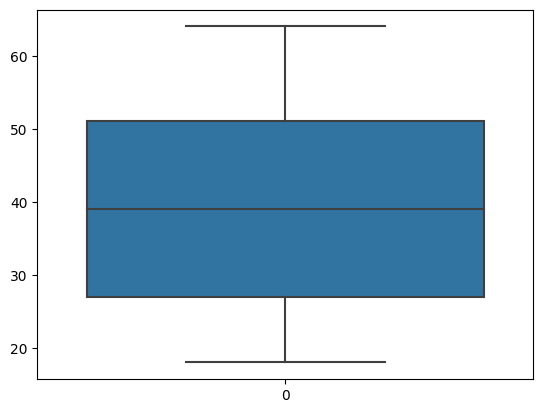

In [36]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

we can see that there are no outliers present in age column

<Axes: >

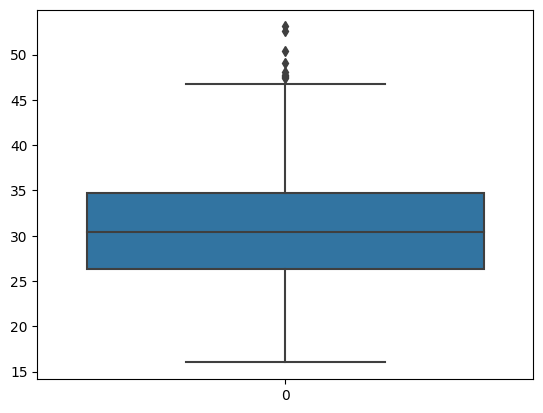

In [37]:
sns.boxplot(df['bmi'])

Since the data in the bmi column is continuous, we must treat the outliers by replacing the values with the mean in order to treat the outliers.

In [38]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print("lower limit:",lowlim)
print("Upper limit:",upplim)

lower limit: 13.699999999999998
Upper limit: 47.300000000000004


<Axes: >

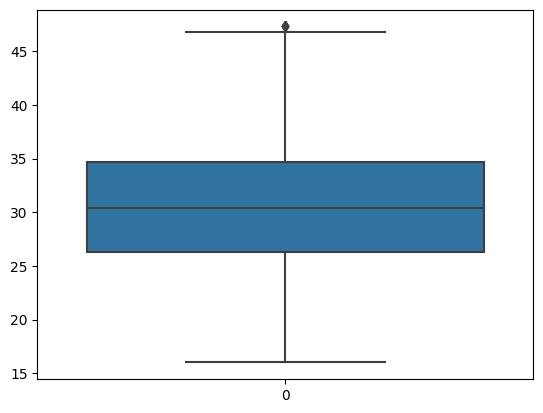

In [39]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

# Data Wrangling

In [40]:
df['bmi'].skew()

0.2334283076914668

In [41]:
df['age'].skew()

0.054780773126998195

The age and BMI data roughly follow a Normal distribution, which is advantageous for the model's learning.

# Encoding

In [42]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [43]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,3,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,0,21984.47
4,32,0,28.9,0,0,0,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,0,10600.55
1334,18,1,31.9,0,0,1,2205.98
1335,18,1,36.9,0,0,2,1629.83
1336,21,1,25.8,0,0,3,2007.95


In [44]:
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.019814,0.112069,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044843,-0.017848,-0.076596,-0.008998,-0.058045
bmi,0.112069,-0.044843,1.000000,0.013574,0.003369,0.156839,0.199298
children,0.041536,-0.017848,0.013574,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003369,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156839,-0.002842,0.012736,1.000000,0.010767
expenses,0.298308,-0.058045,0.199298,0.067389,0.787234,0.010767,1.000000


# Model Development

# Linear Regression

In [45]:
X=df.drop(['expenses'],axis=1)
Y=df[['expenses']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)
    df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1

,train acc,test acc,cvs
0,0.741684,0.778388,0.747086
1,0.756416,0.706279,0.747086
2,0.729567,0.806226,0.747086
3,0.754273,0.732813,0.747086
4,0.742987,0.779584,0.747086
5,0.753298,0.731771,0.747086
6,0.741278,0.776464,0.747086
7,0.731964,0.796163,0.747086
8,0.751938,0.741720,0.747086
9,0.756363,0.722583,0.747086


In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print("Linear Regression Train Score:", lrmodel.score(xtrain,ytrain))
print("Linear Regression Test Score:",lrmodel.score(xtest,ytest))
print("Cross Validation Score:", cross_val_score(lrmodel,X,Y,cv=5,).mean())

Linear Regression Train Score: 0.7295673146243207
Linear Regression Test Score: 0.806226185647388
Cross Validation Score: 0.7470863719348164


# SVM

In [47]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print("SVR Train Score:",r2_score(ytrain,ypredtrain1))
print("SVR Test Score:",r2_score(ytest,ypredtest1))
print("SVR Cross val Score:",cross_val_score(svrmodel,X,Y,cv=5,).mean())

SVR Train Score: -0.10151556923589111
SVR Test Score: -0.1344463689752997
SVR Cross val Score: -0.10374609837645332


# Random Forest Regressor

In [48]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print("Random Forest Train Score:",r2_score(ytrain,ypredtrain2))
print("Random Forest Test Score:",r2_score(ytest,ypredtest2))
print("Random Forest Cross val Score:",cross_val_score(rfmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print("Random Forest Train Score(with n_estimators):",r2_score(ytrain,ypredtrain2))
print("Random Forest Test Score(with n_estimators):",r2_score(ytest,ypredtest2))
print("Random Forest Cross val Score(with n_estimators):",cross_val_score(rfmodel,X,Y,cv=5,).mean())

Random Forest Train Score: 0.9738599820366586
Random Forest Test Score: 0.8816457638454468
Random Forest Cross val Score: 0.83653214241497
{'n_estimators': 120}
Random Forest Train Score(with n_estimators): 0.9747108736041186
Random Forest Test Score(with n_estimators): 0.881983452107504
Random Forest Cross val Score(with n_estimators): 0.8371600233536036


# Gradient Boost Regressor

In [49]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print("Gradient boosting regressor Train score:",r2_score(ytrain,ypredtrain3))
print("Gradient boosting regressor Test score:",r2_score(ytest,ypredtest3))
print("Gradient boosting regressor Cross val score:",cross_val_score(gbmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print("Gradient boosting regressor Train score(with estimator):",r2_score(ytrain,ypredtrain3))
print("Gradient boosting regressor Test score(with estimator):",r2_score(ytest,ypredtest3))
print("Gradient boosting regressor Cross val score(with estimator):",cross_val_score(gbmodel,X,Y,cv=5,).mean())

Gradient boosting regressor Train score: 0.8903912282468484
Gradient boosting regressor Test score: 0.899313002079365
Gradient boosting regressor Cross val score: 0.8554435978889335
{'learning_rate': 0.2, 'n_estimators': 19}
Gradient boosting regressor Train score(with estimator): 0.8668967296432014
Gradient boosting regressor Test score(with estimator): 0.901260150507639
Gradient boosting regressor Cross val score(with estimator): 0.860778961577009


# XGB Regressor

In [50]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print("XGB regressor Train score:",r2_score(ytrain,ypredtrain4))
print("XGB regressor Test score:",r2_score(ytest,ypredtest4))
print("XGB regressor Cross val score:",cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print("XGB regressor Train score(with estimator):",r2_score(ytrain,ypredtrain4))
print("XGB regressor Test score(with estimator):",r2_score(ytest,ypredtest4))
print("XGB regressor Cross val score(with estimator):",cross_val_score(xgmodel,X,Y,cv=5,).mean())

XGB regressor Train score: 0.995357533910149
XGB regressor Test score: 0.8656051808723032
XGB regressor Cross val score: 0.8087373672029636
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
XGB regressor Train score(with estimator): 0.8699851567810317
XGB regressor Test score(with estimator): 0.9016817003144124
XGB regressor Cross val score(with estimator): 0.8600637797920363


# Comparison of all models


Comparing all the models we can see that XGBoost regressor has the consistency over the train,test and CV acuuracy scores so we are going to predict the price estimation using that model.

In [51]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.039921
sex,0.000000
bmi,0.126126
children,0.012205
smoker,0.817423
region,0.004324


In [52]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.039921
bmi,0.126126
children,0.012205
smoker,0.817423


In [53]:
df.drop(df[['sex','region']],axis=1,inplace=True)

In [54]:
Xf=df.drop(df[['expenses']],axis=1)

In [55]:
X=df.drop(df[['expenses']],axis=1)

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print("Train Accuracy:",r2_score(ytrain,ypredtrain4))
print("Test Accuracy:",r2_score(ytest,ypredtest4))
print("CV score:",cross_val_score(finalmodel,X,Y,cv=5,).mean())

Train Accuracy: 0.8685410818226579
Test Accuracy: 0.9013273068410427
CV score: 0.86042931732906


In [57]:
from pickle import dump
dump(finalmodel,open('insurancemodelf.pkl','wb'))

In [65]:
new_data=pd.DataFrame({'age':27,'sex':'female','bmi':27.9,'children':0,'smoker':'no','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([4638.5693], dtype=float32)

The XGBoost model has the highest accuracy of all the models, which indicates that its predictions are more accurate than those of the other models.